In [13]:
import pandas as pd
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt

Import the relevant subset

In [61]:
url = 'https://raw.githubusercontent.com/Jneny/Hospitalcapacity/main/Data/icu_beds.csv'
data = read_csv(url, header=0, parse_dates=[0], index_col=0)
data = data.asfreq('d')
adultcrit = pd.DataFrame(data, columns=['adult_icu_crci_patients'])
sadultcrit = pd.Series(adultcrit.adult_icu_crci_patients)

Print the attribute type : Numeric integer, the data is quantitative and discrete as it measures each patient occupancy in terms of beds

In [62]:
print(adultcrit.info())
print(adultcrit.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 655 entries, 2020-05-01 to 2022-02-14
Freq: D
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   adult_icu_crci_patients  655 non-null    int64
dtypes: int64(1)
memory usage: 10.2 KB
None
            adult_icu_crci_patients
date                               
2020-05-01                      244
2020-05-02                      236
2020-05-03                      246
2020-05-04                      243
2020-05-05                      243


check for missing observations in feature attribute


In [22]:
data.isnull().values.any()

False

In [7]:
data.duplicated(keep='first')
missing1 = (data['adult_icu_crci_patients'] == 0).sum()
print(missing1)

0


In [23]:
#check for times when there a provincial shortage of occupancy space when no beds were aviailable
icumax = (data['available_adult_icu_beds'] == 0).sum()
print(icumax)

0


In [24]:
#Find max, min, mean and standard deviation of main attributes.
adultcrit.describe()

,adult_icu_crci_patients
count,655.000000
mean,251.783206
std,204.279555
min,18.000000
25%,114.500000
50%,172.000000
75%,349.500000
max,889.000000


Attribute elimination: We will want to focus on the patients in critical conditions rather than amount of beds available or total because it will be more useful to know now many are absolutely necessary to set aside for CRCI patients within the ICU, and the focus will be on adult CRCI patients as the adult population including seniors has been most fatally affected by COVID. 
Therefore, the main variable of focus will be adult CRCI patient numbers. As the objective is univariate time series analysis, the statistical method means all other attributes can be eliminated.

In [63]:
import seaborn as sns

In [60]:
adultcrit2 = adultcrit.copy(deep=True)

Distribution of data points by month

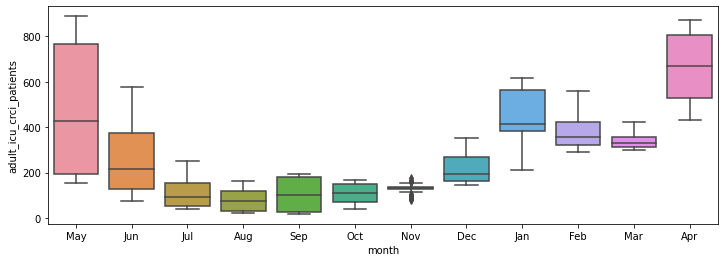

In [66]:
adultcrit2['month'] = adultcrit2.index.strftime('%b')
fig, ax = plt.subplots()
fig.set_size_inches((12,4))
sns.boxplot(x='month',y='adult_icu_crci_patients',data=adultcrit2,ax=ax)
plt.show()

Graphing the data, finding majority of critical patients needed care around after Jan and during May, early in the year
Outliers cannot be disregarded as every datapoint is important for the timeseries

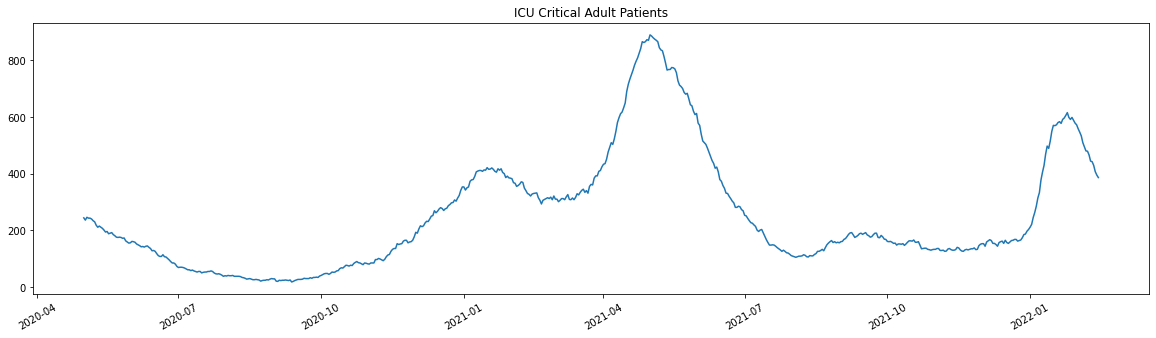

In [47]:
plt.plot(sadultcrit) #main focus
plt.title('ICU Critical Adult Patients')
plt.xticks(rotation = 30)
plt.show()

Distribution 
Correlation
Balance - all class variables are balanced as there are no missing values and we are only using one attribute
The feature attribute does not need to be transformed as adult_icu_crci_patients is already measured as patients in critical care occupying a bed

Check for additive/ multiplicative components of adult_icu_crci_patients. Shows trend, seasonality, and noise

Results show trend exists, not much seasonality in both, considerable noise in additive model meaning more variability. 

In [68]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [74]:
add_result = seasonal_decompose(adultcrit, model = "additive")
mul_result = seasonal_decompose(adultcrit, model = "multiplicative")

Text(0.5, 0.98, '\n Additive Decompose')

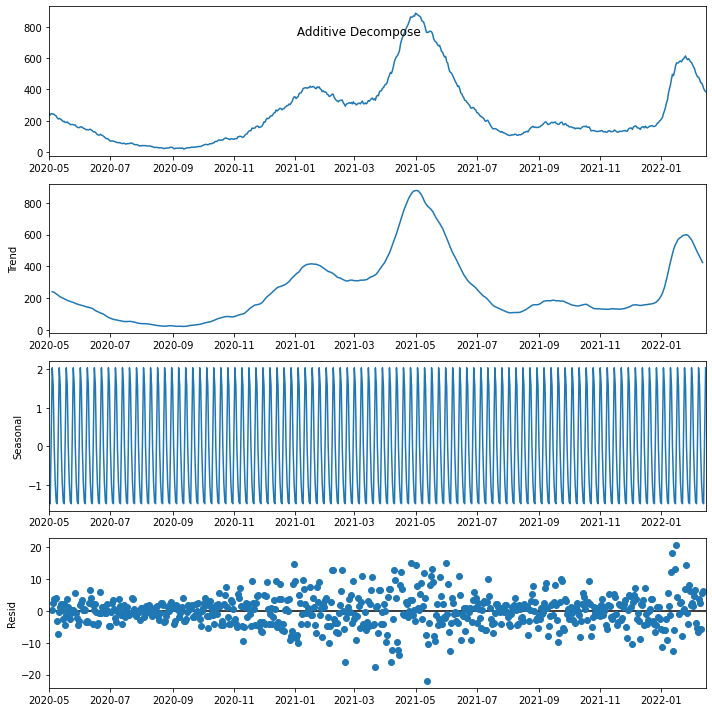

In [75]:
plt.rcParams.update({'figure.figsize': (10,10)})
add_result.plot().suptitle('\n Additive Decompose', fontsize = 12)

Text(0.5, 0.98, '\n Multiplicative Decompose')

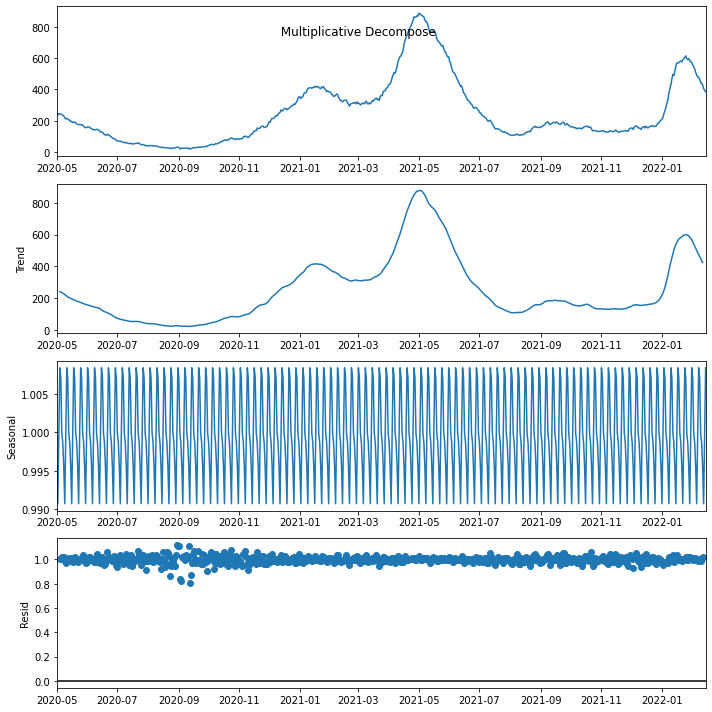

In [76]:
plt.rcParams.update({'figure.figsize': (10,10)})
mul_result.plot().suptitle('\n Multiplicative Decompose', fontsize = 12)

Checking stationarity of dataset as to run the time series through ARIMA will require constant mean and variance.

In [77]:
from statsmodels.tsa.stattools import adfuller

In [78]:
adfuller(adultcrit.adult_icu_crci_patients.values)

(-2.415029400292793,
 0.1375393258204045,
 17,
 637,
 {'1%': -3.44065745275905,
  '5%': -2.8660879520543534,
  '10%': -2.5691919933016076},
 4278.403262572921)

Not stationary as-is, will need to smooth to use in ARIMA - done in the "Modelling.ipynb" file

In [80]:
#End of EDA